In [1]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

Data cleaning and preparation

In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [6]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [7]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(99999999, np.nan)

In [8]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [9]:
df = df[df['status'] != 'unk'].reset_index(drop=True)

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = (df_train['status'] == 'default').astype('int').values
y_val = (df_val['status'] == 'default').astype('int').values
y_test = (df_test['status'] == 'default').astype('int').values

In [13]:
del df_train['status']
del df_val['status']
del df_test['status']

In [14]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897


Decision trees

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [16]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [17]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [20]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6542224697876051

In [21]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [22]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [24]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



Decision trees parameter tuning

In [25]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.758
  10 -> 0.685
  15 -> 0.654
  20 -> 0.654
None -> 0.657


In [26]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

In [27]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [28]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.754
2                 0.761  0.766  0.767
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.773
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

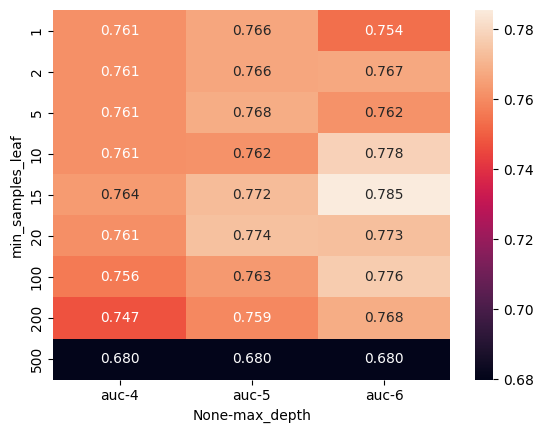

In [29]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [30]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Ensembles and random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [34]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

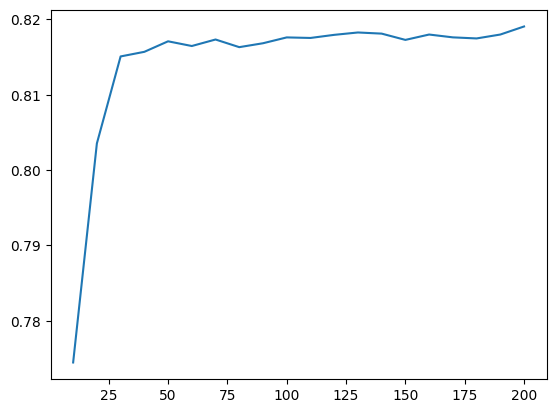

In [35]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores['n_estimators'], df_scores['auc'])

In [36]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            n_estimators=n, 
            max_depth=d, 
            random_state=1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [37]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


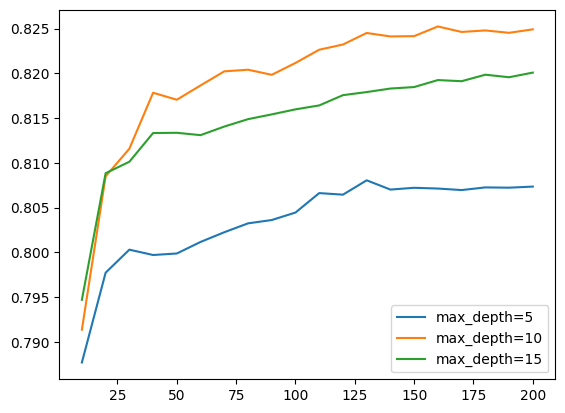

In [38]:
scores = []

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores['max_depth'] == d]
    plt.plot(df_subset['n_estimators'], df_subset['auc'], 
             label='max_depth=%d' % d)

plt.legend()

In [39]:
max_depth = 10

In [40]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            n_estimators=n, 
            max_depth=max_depth, 
            min_samples_leaf=s, 
            random_state=1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [41]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


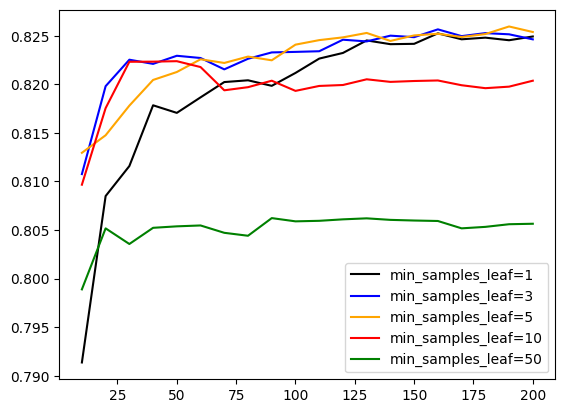

In [42]:
colors = ['black', 'blue', 'orange', 'red', 'green']
samples_min_samples_leaf = [1, 3, 5, 10, 50]
scores = []

for s, color in zip(samples_min_samples_leaf, colors):
    df_subset = df_scores[df_scores['min_samples_leaf'] == s]
    plt.plot(df_subset['n_estimators'], df_subset['auc'], 
             color=color,             
             label='min_samples_leaf=%d' % s)

plt.legend()

In [43]:
samples_min_samples_leaf = 3
n = 200

In [44]:
rf = RandomForestClassifier(
    n_estimators=n, 
    max_depth=max_depth, 
    min_samples_leaf=s, 
    random_state=1, 
)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8056446925480127

Gradient boosting and XGBoost

In [46]:
import xgboost as xgb

In [47]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [48]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6, 
    'min_child_weight': 1, 

    'objective': 'binary:logistic', 
    'nthread': 8, 

    'seed': 1, 
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [49]:
y_pred = model.predict(dval)

In [50]:
roc_auc_score(y_val, y_pred)

0.8118506454190986

In [51]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [52]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6, 
    'min_child_weight': 1, 

    'objective': 'binary:logistic', 
    'eval_metric': 'auc', 
    'nthread': 8, 

    'seed': 1, 
    'verbosity': 1
}
model = xgb.train(
    xgb_params, 
    dtrain, 
    num_boost_round=200, 
    evals=watchlist
)

In [53]:
def parse_xgb_output(output):
    s = output.stdout.strip().split('\n')
    it_lines = [x.split('\t') for x in s]
    it = [int(x[0].strip('[]')) for x in it_lines]
    train = [float(x[1].split(':')[1]) for x in it_lines]
    val = [float(x[2].split(':')[1]) for x in it_lines]

    df_results = pd.DataFrame()
    df_results['num_iter'] = it
    df_results['train_auc'] = train
    df_results['val_auc'] = val

    return df_results


In [54]:
df_score = parse_xgb_output(output)

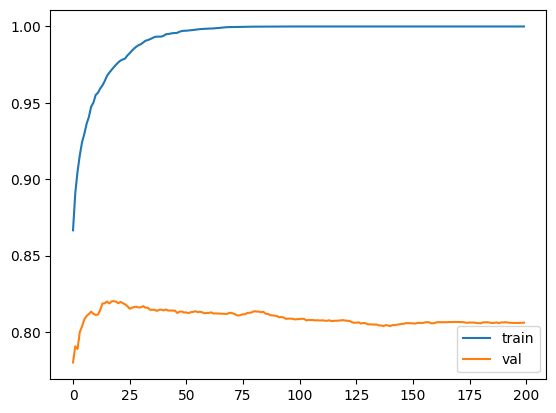

In [55]:
plt.plot(df_score['num_iter'], df_score['train_auc'], label='train')
plt.plot(df_score['num_iter'], df_score['val_auc'], label='val')
plt.legend()

XGBoost parameter tuning: eta, max_depth, min_child_weight

In [56]:
scores = {}

In [ ]:
# eta: 0.01, 0.05, 0.1, 0.3, 1.0

In [70]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [71]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [72]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

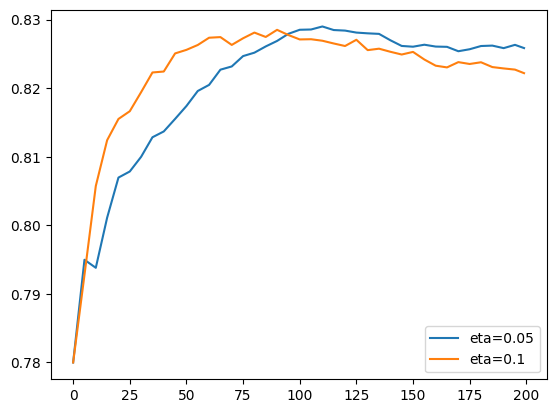

In [73]:
for key, df_score in scores.items():
    if key in ['eta=0.01', 'eta=1.0', 'eta=0.3']:
        continue
    plt.plot(df_score['num_iter'], df_score['val_auc'], label=key)
plt.legend()

In [74]:
# max_depth = 6 / min_child_weight=1
for eta in [0.01, 0.05, 0.1, 0.3, 1.0]:
    print(eta)
    print(scores[f'eta={eta}'][scores[f'eta={eta}']['val_auc'] == scores[f'eta={eta}']['val_auc'].max()])
    print('----------------------------------')

0.01
    num_iter  train_auc  val_auc
40       199    0.93932  0.81484
----------------------------------
0.05
    num_iter  train_auc  val_auc
22       110    0.97299    0.829
----------------------------------
0.1
    num_iter  train_auc  val_auc
18        90     0.9877  0.82851
----------------------------------
0.3
   num_iter  train_auc  val_auc
3        15    0.96767  0.81993
----------------------------------
1.0
    num_iter  train_auc  val_auc
23       115        1.0  0.79466
----------------------------------


In [ ]:
# max_depth 3, 4, 6, 10, 30

In [109]:
scores = {}

In [124]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 30,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [125]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=30'

In [126]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10', 'max_depth=30'])

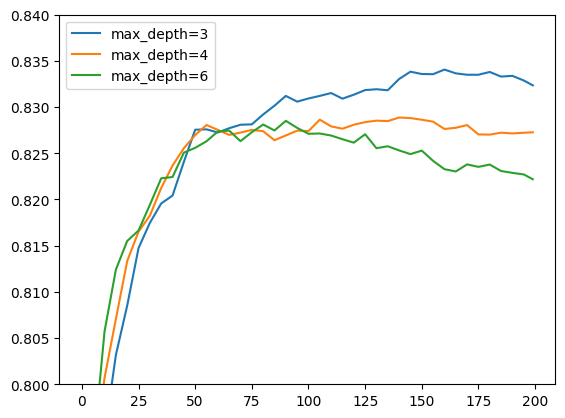

In [127]:
for key, df_score in scores.items():
    if key in ['max_depth=10', 'max_depth=30']:
        continue
    plt.plot(df_score['num_iter'], df_score['val_auc'], label=key)

plt.ylim(0.8, 0.84)
plt.legend()

In [130]:
# max_depth = 6 / min_child_weight=1
for max_depth in [3, 4, 6, 10, 30]:
    print(max_depth)
    print(scores[f'max_depth={max_depth}'][scores[f'max_depth={max_depth}']['val_auc'] == scores[f'max_depth={max_depth}']['val_auc'].max()])
    print('----------------------------------')

3
    num_iter  train_auc  val_auc
32       160    0.93392  0.83406
----------------------------------
4
    num_iter  train_auc  val_auc
28       140    0.95997  0.82887
----------------------------------
6
    num_iter  train_auc  val_auc
18        90     0.9877  0.82851
----------------------------------
10
    num_iter  train_auc  val_auc
24       120        1.0  0.80742
----------------------------------
30
    num_iter  train_auc  val_auc
17        85        1.0  0.80921
----------------------------------


In [ ]:
# min_child_weight 1, 5, 10, 30

In [94]:
scores = {}

In [104]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [105]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [106]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=30'])

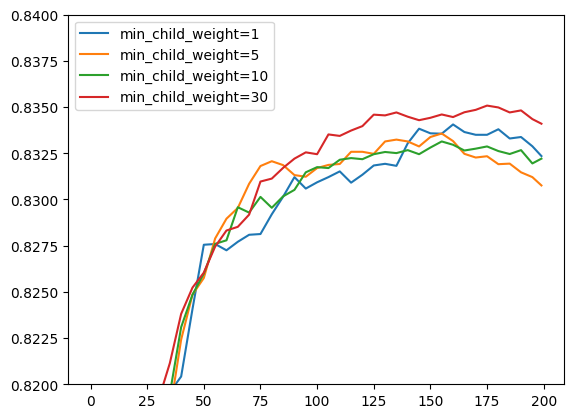

In [ ]:
for key, df_score in scores.items():
    plt.plot(df_score['num_iter'], df_score['val_auc'], label=key)

plt.ylim(0.82, 0.84)
plt.legend()

In [108]:
# max_depth = 6 / min_child_weight=1
for min_child_weight in [1, 5, 10, 30]:
    print(min_child_weight)
    print(scores[f'min_child_weight={min_child_weight}'][scores[f'min_child_weight={min_child_weight}']['val_auc'] == scores[f'min_child_weight={min_child_weight}']['val_auc'].max()])
    print('----------------------------------')

1
    num_iter  train_auc  val_auc
32       160    0.93392  0.83406
----------------------------------
5
    num_iter  train_auc  val_auc
31       155     0.9253  0.83357
----------------------------------
10
    num_iter  train_auc  val_auc
31       155     0.9166  0.83314
----------------------------------
30
    num_iter  train_auc  val_auc
35       175    0.90113  0.83508
----------------------------------


In [ ]:
# num_boost_round [90, 120, 160, 175, 190]

In [152]:
scores = {}

In [165]:
%%capture output

num_boost_round = 190

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round,
                  verbose_eval=5,
                  evals=watchlist)

In [166]:
key = f'num_boost_round={num_boost_round}'
scores[key] = parse_xgb_output(output)
key

'num_boost_round=190'

In [167]:
scores.keys()

dict_keys(['num_boost_round=90', 'num_boost_round=120', 'num_boost_round=160', 'num_boost_round=175', 'num_boost_round=190'])

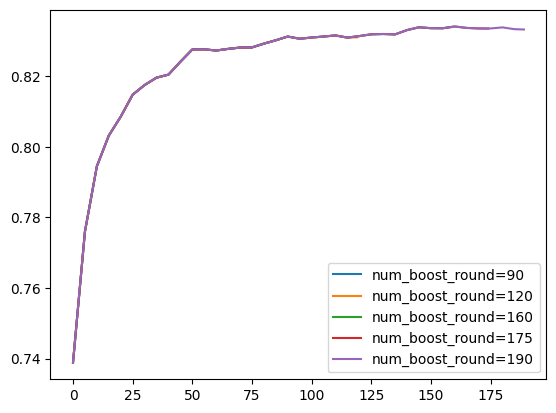

In [169]:
for key, df_score in scores.items():
    if key in ['max_depth=10', 'eta=1.0', 'eta=0.3']:
        continue
    plt.plot(df_score['num_iter'], df_score['val_auc'], label=key)

# plt.ylim(0.82, 0.84)
plt.legend()

In [170]:
# max_depth = 6 / min_child_weight=1
for num_boost_round in [90, 120, 160, 175, 190]:
    print(num_boost_round)
    print(scores[f'num_boost_round={num_boost_round}'][scores[f'num_boost_round={num_boost_round}']['val_auc'] == scores[f'num_boost_round={num_boost_round}']['val_auc'].max()])
    print('----------------------------------')

90
    num_iter  train_auc  val_auc
18        89    0.91606  0.83102
----------------------------------
120
    num_iter  train_auc  val_auc
22       110     0.9229  0.83152
----------------------------------
160
    num_iter  train_auc  val_auc
32       159    0.93373  0.83394
----------------------------------
175
    num_iter  train_auc  val_auc
32       160    0.93392  0.83406
----------------------------------
190
    num_iter  train_auc  val_auc
32       160    0.93392  0.83406
----------------------------------


In [ ]:
# Final model:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=160)

Selecting the final model

In [171]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7848562640769174

In [172]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [173]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=160)

y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.833937783051997

In [174]:
df_full_train = df_full_train.reset_index(drop=True)

In [175]:
y_full_train = (df_full_train.status == 'default').astype(int).values
del df_full_train['status']

In [176]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [177]:
features = dv.get_feature_names_out().tolist()

dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)

dtest = xgb.DMatrix(X_test, feature_names=features)

In [180]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=160)

y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8314476320805435